In [1]:
#importing important libraries

import pandas as pd
import numpy as np

#libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for model building and understanding
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#to display all the columns in the dataset
pd.set_option('display.max_columns', 500)

### Reading Data

In [2]:
# importing the dataset
sp = pd.read_csv('Car details v3csv')

### Understanding the dataset

This dataset contains information about used cars listed on www.cardekho.com

The columns in the given dataset are as follows:

    - name of the car
    - year bought
    - selling_price of the car
    - km_driven
    - fuel
    - seller_type
    - transmission
    - Owner
    - mielage
    - engine
    - Max power
    - torque
    - No. of seats

In [3]:
sp.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
sp.shape

(8128, 13)

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# printing total number of null values in every column

sp.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
sp.min()

name             Ambassador CLASSIC 1500 DSL AC
year                                       1983
selling_price                             29999
km_driven                                     1
fuel                                        CNG
seller_type                              Dealer
transmission                          Automatic
owner                               First Owner
seats                                         2
dtype: object

In [8]:
sp.max()

name             Volvo XC90 T8 Excellence BSIV
year                                      2020
selling_price                         10000000
km_driven                              2360457
fuel                                    Petrol
seller_type                   Trustmark Dealer
transmission                            Manual
owner                              Third Owner
seats                                       14
dtype: object

In [9]:
sp.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Data processing

In [10]:
# creating different columns for car brand and car name
sp['brand']=sp['name'].apply(lambda x: ' '.join(x.split(' ')[:2]) if 'Land' in x else x.split(' ')[0])
sp['car']=sp['name'].apply(lambda x: ' '.join(x.split(' ')[2:]) if 'Land' in x else ' '.join(x.split(' ')[1:]))
sp.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,car
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


In [11]:
# we will be making our predicts on car brands thus we can drop the car name and name coulums
sp = sp.drop(['name','car'],axis = 1)

In [12]:
sp.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,Toyota
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,Ford


In [13]:
# using dropna() function to remove missing values  
sp = sp.dropna(how='any',axis=0) 

In [14]:
#verifying that our dataframe has no null values
round(100*(sp.isnull().sum()/len(sp.index)), 2)

year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
torque           0.0
seats            0.0
brand            0.0
dtype: float64

In [15]:
sp.shape

(7906, 13)

In [16]:
#list of transmission types
trans =list(sp['transmission'].unique())
trans

['Manual', 'Automatic']

In [17]:
# list of seller types
seller = list(sp['seller_type'].unique())
seller

['Individual', 'Dealer', 'Trustmark Dealer']

In [18]:
# fuel type
fuel = list(sp['fuel'].unique())
fuel

['Diesel', 'Petrol', 'LPG', 'CNG']

In [19]:
# ownership type
owner = list(sp['owner'].unique())
owner

['First Owner',
 'Second Owner',
 'Third Owner',
 'Fourth & Above Owner',
 'Test Drive Car']

In [20]:
#list of all brands
brands=list(sp['brand'].unique())
brands

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Toyota',
 'Ford',
 'Renault',
 'Mahindra',
 'Tata',
 'Chevrolet',
 'Datsun',
 'Jeep',
 'Mercedes-Benz',
 'Mitsubishi',
 'Audi',
 'Volkswagen',
 'BMW',
 'Nissan',
 'Lexus',
 'Jaguar',
 'Land Rover',
 'MG',
 'Volvo',
 'Daewoo',
 'Kia',
 'Fiat',
 'Force',
 'Ambassador',
 'Ashok',
 'Isuzu',
 'Opel',
 'Toyota Land']

In [21]:
#list of all years
years=list(sp['year'].unique())
years

[2014,
 2006,
 2010,
 2007,
 2017,
 2001,
 2011,
 2013,
 2005,
 2009,
 2016,
 2012,
 2002,
 2015,
 2018,
 2019,
 2008,
 2020,
 1999,
 2000,
 2003,
 2004,
 1994,
 1998,
 1997,
 1995,
 1996]

In [22]:
# extracting features
sp['average_kmpl'] = sp['mileage'].str.split(' ').str[0]
sp['engine_cc'] = sp['engine'].str.split(' ').str[0]
sp['power_bhp'] = sp['max_power'].str.split(' ').str[0]
sp['torque'] = sp['torque'].str.lower()
sp['rpm'] = sp['torque'].str.split('nm').str[0]
sp['Torque'] = sp['rpm'].str.split('@').str[0]
sp['torque_nm'] = sp['Torque'].str.split(' ').str[0]
sp['Torque_nm'] = sp['torque_nm'].str.split('kgm').str[0]
sp['Torq_nm'] = sp['Torque_nm'].str.split('(').str[0]
#droping extra columns
sp = sp.drop(['mileage','engine','max_power','torque','rpm','Torque','torque_nm','Torque_nm'],axis =1)

In [23]:
sp.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,average_kmpl,engine_cc,power_bhp,Torq_nm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,1248,74,190
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,1498,103.52,250
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,1497,78,12.7
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,1396,90,22.4
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,1298,88.2,11.5


In [24]:
#rounding price and km values
# price = xK and km = xK

sp['selling_price']=sp['selling_price'].apply(lambda val: round(val/1000,2))
pd.options.display.float_format = '{:,.2f}'.format

sp['km_driven']=sp['km_driven'].apply(lambda val: round(val/1000,2))
pd.options.display.float_format = '{:,.2f}'.format

In [25]:
sp.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,average_kmpl,engine_cc,power_bhp,Torq_nm
0,2014,450.00,145.50,Diesel,Individual,Manual,First Owner,5.00,Maruti,23.4,1248,74,190
1,2014,370.00,120.00,Diesel,Individual,Manual,Second Owner,5.00,Skoda,21.14,1498,103.52,250
2,2006,158.00,140.00,Petrol,Individual,Manual,Third Owner,5.00,Honda,17.7,1497,78,12.7
3,2010,225.00,127.00,Diesel,Individual,Manual,First Owner,5.00,Hyundai,23.0,1396,90,22.4
4,2007,130.00,120.00,Petrol,Individual,Manual,First Owner,5.00,Maruti,16.1,1298,88.2,11.5


In [26]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   float64
 2   km_driven      7906 non-null   float64
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   seats          7906 non-null   float64
 8   brand          7906 non-null   object 
 9   average_kmpl   7906 non-null   object 
 10  engine_cc      7906 non-null   object 
 11  power_bhp      7906 non-null   object 
 12  Torq_nm        7906 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 864.7+ KB


In [27]:
# converting appropriate data types
sp['year'] = sp['year'].apply(str)
sp['seats'] = sp['seats'].apply(str)
sp['average_kmpl'] = sp['average_kmpl'].apply(float)
sp['engine_cc'] = sp['engine_cc'].apply(int)
sp['power_bhp'] = sp['power_bhp'].apply(float)
sp['Torq_nm'] = sp['Torq_nm'].apply(float)


## EDA

In [28]:
#Finding correlation
cor = sp.corr()
cor

,selling_price,km_driven,average_kmpl,engine_cc,power_bhp,Torq_nm
selling_price,1.00,-0.22,-0.13,0.46,0.75,0.62
km_driven,-0.22,1.00,-0.17,0.21,-0.04,-0.00
average_kmpl,-0.13,-0.17,1.00,-0.58,-0.37,-0.17
engine_cc,0.46,0.21,-0.58,1.00,0.70,0.63
power_bhp,0.75,-0.04,-0.37,0.70,1.00,0.77
Torq_nm,0.62,-0.00,-0.17,0.63,0.77,1.00


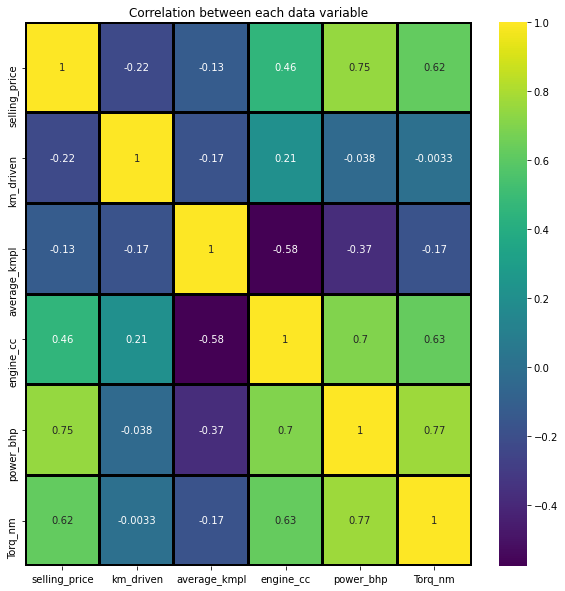

In [29]:
# visulaising correlation using heatmap
plt.subplots(figsize=(10, 10))
plt.title('Correlation between each data variable')
sns.heatmap(cor, xticklabels=cor.columns.values,
            yticklabels=cor.columns.values,annot= True,linecolor="black",linewidths=2, cmap="viridis")
plt.show()

Text(0.5, 1.0, 'Torq_nm vs selling_price')

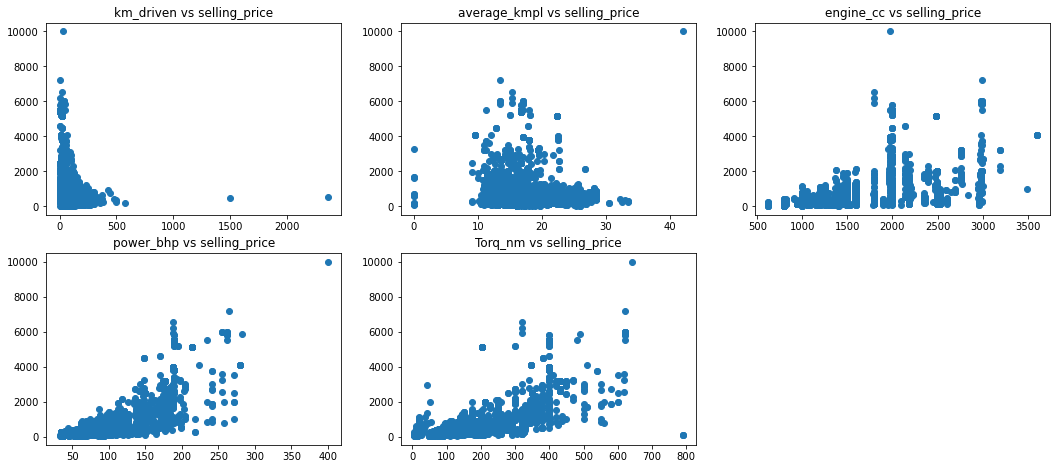

In [30]:
#scatter plot for numerical data with yaxis fixed as selling_price

plt.figure(figsize=[18,12])

plt.subplot(3,3,1)
plt.scatter(sp.km_driven, sp.selling_price)
plt.title('km_driven vs selling_price')
plt.subplot(3,3,2)
plt.scatter(sp.average_kmpl, sp.selling_price)
plt.title('average_kmpl vs selling_price')

plt.subplot(3,3,3)
plt.scatter(sp.engine_cc, sp.selling_price)
plt.title('engine_cc vs selling_price')
plt.subplot(3,3,4)
plt.scatter(sp.power_bhp, sp.selling_price)
plt.title('power_bhp vs selling_price')
plt.subplot(3,3,5)
plt.scatter(sp.Torq_nm, sp.selling_price)
plt.title('Torq_nm vs selling_price')

### Visualising categorical data

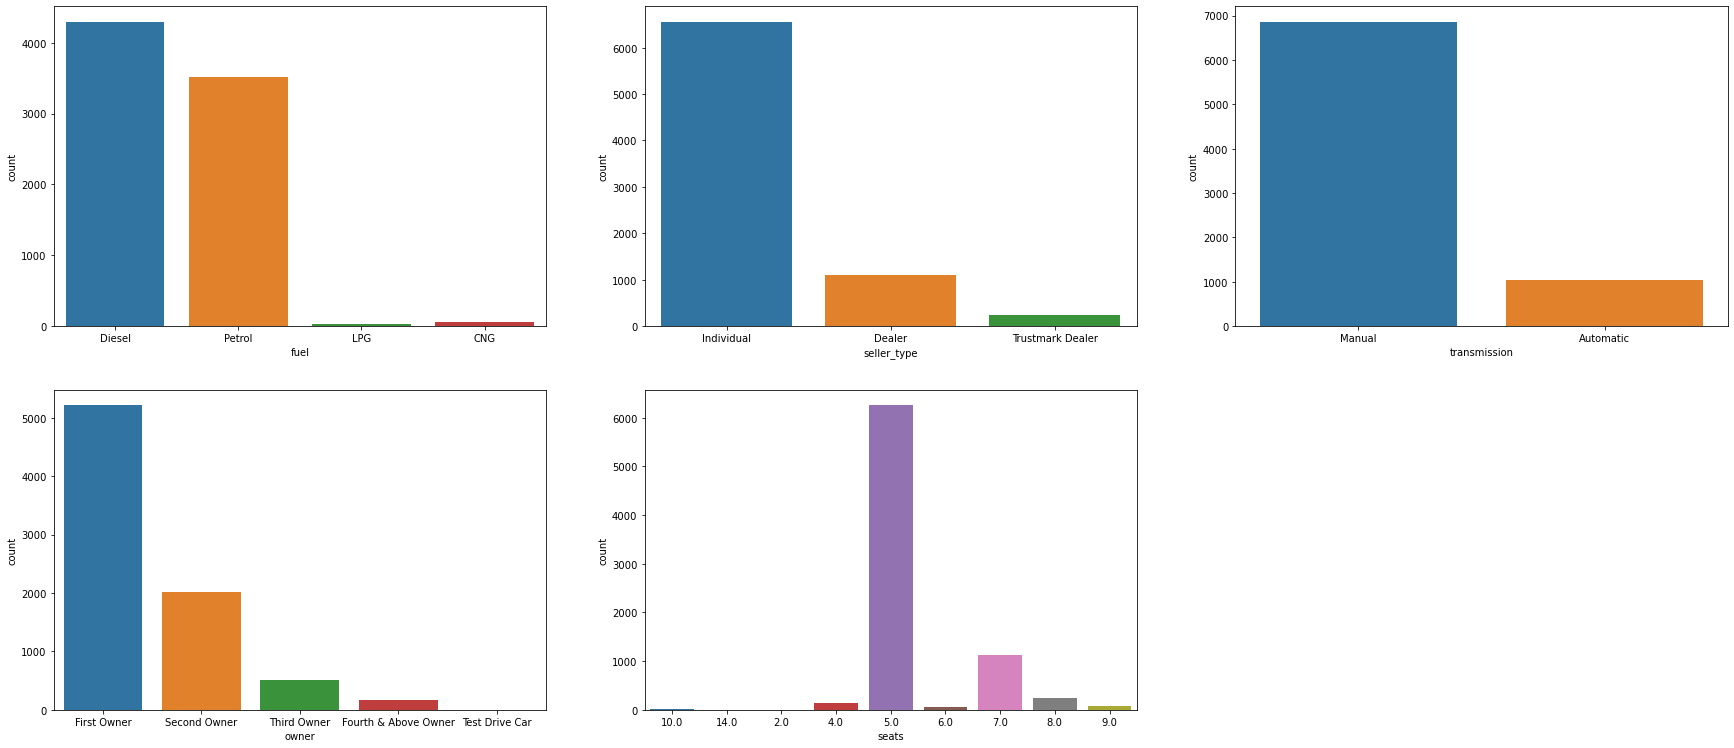

In [31]:
plt.figure(figsize=(30, 20))

plt.subplot(3,3,1)
sns.countplot(sp.fuel)

plt.subplot(3,3,2)
sns.countplot(sp.seller_type)

plt.subplot(3,3,3)
sns.countplot(sp.transmission)

plt.subplot(3,3,4)
sns.countplot(sp.owner)

plt.subplot(3,3,5)
sns.countplot(sp.seats)

plt.show()

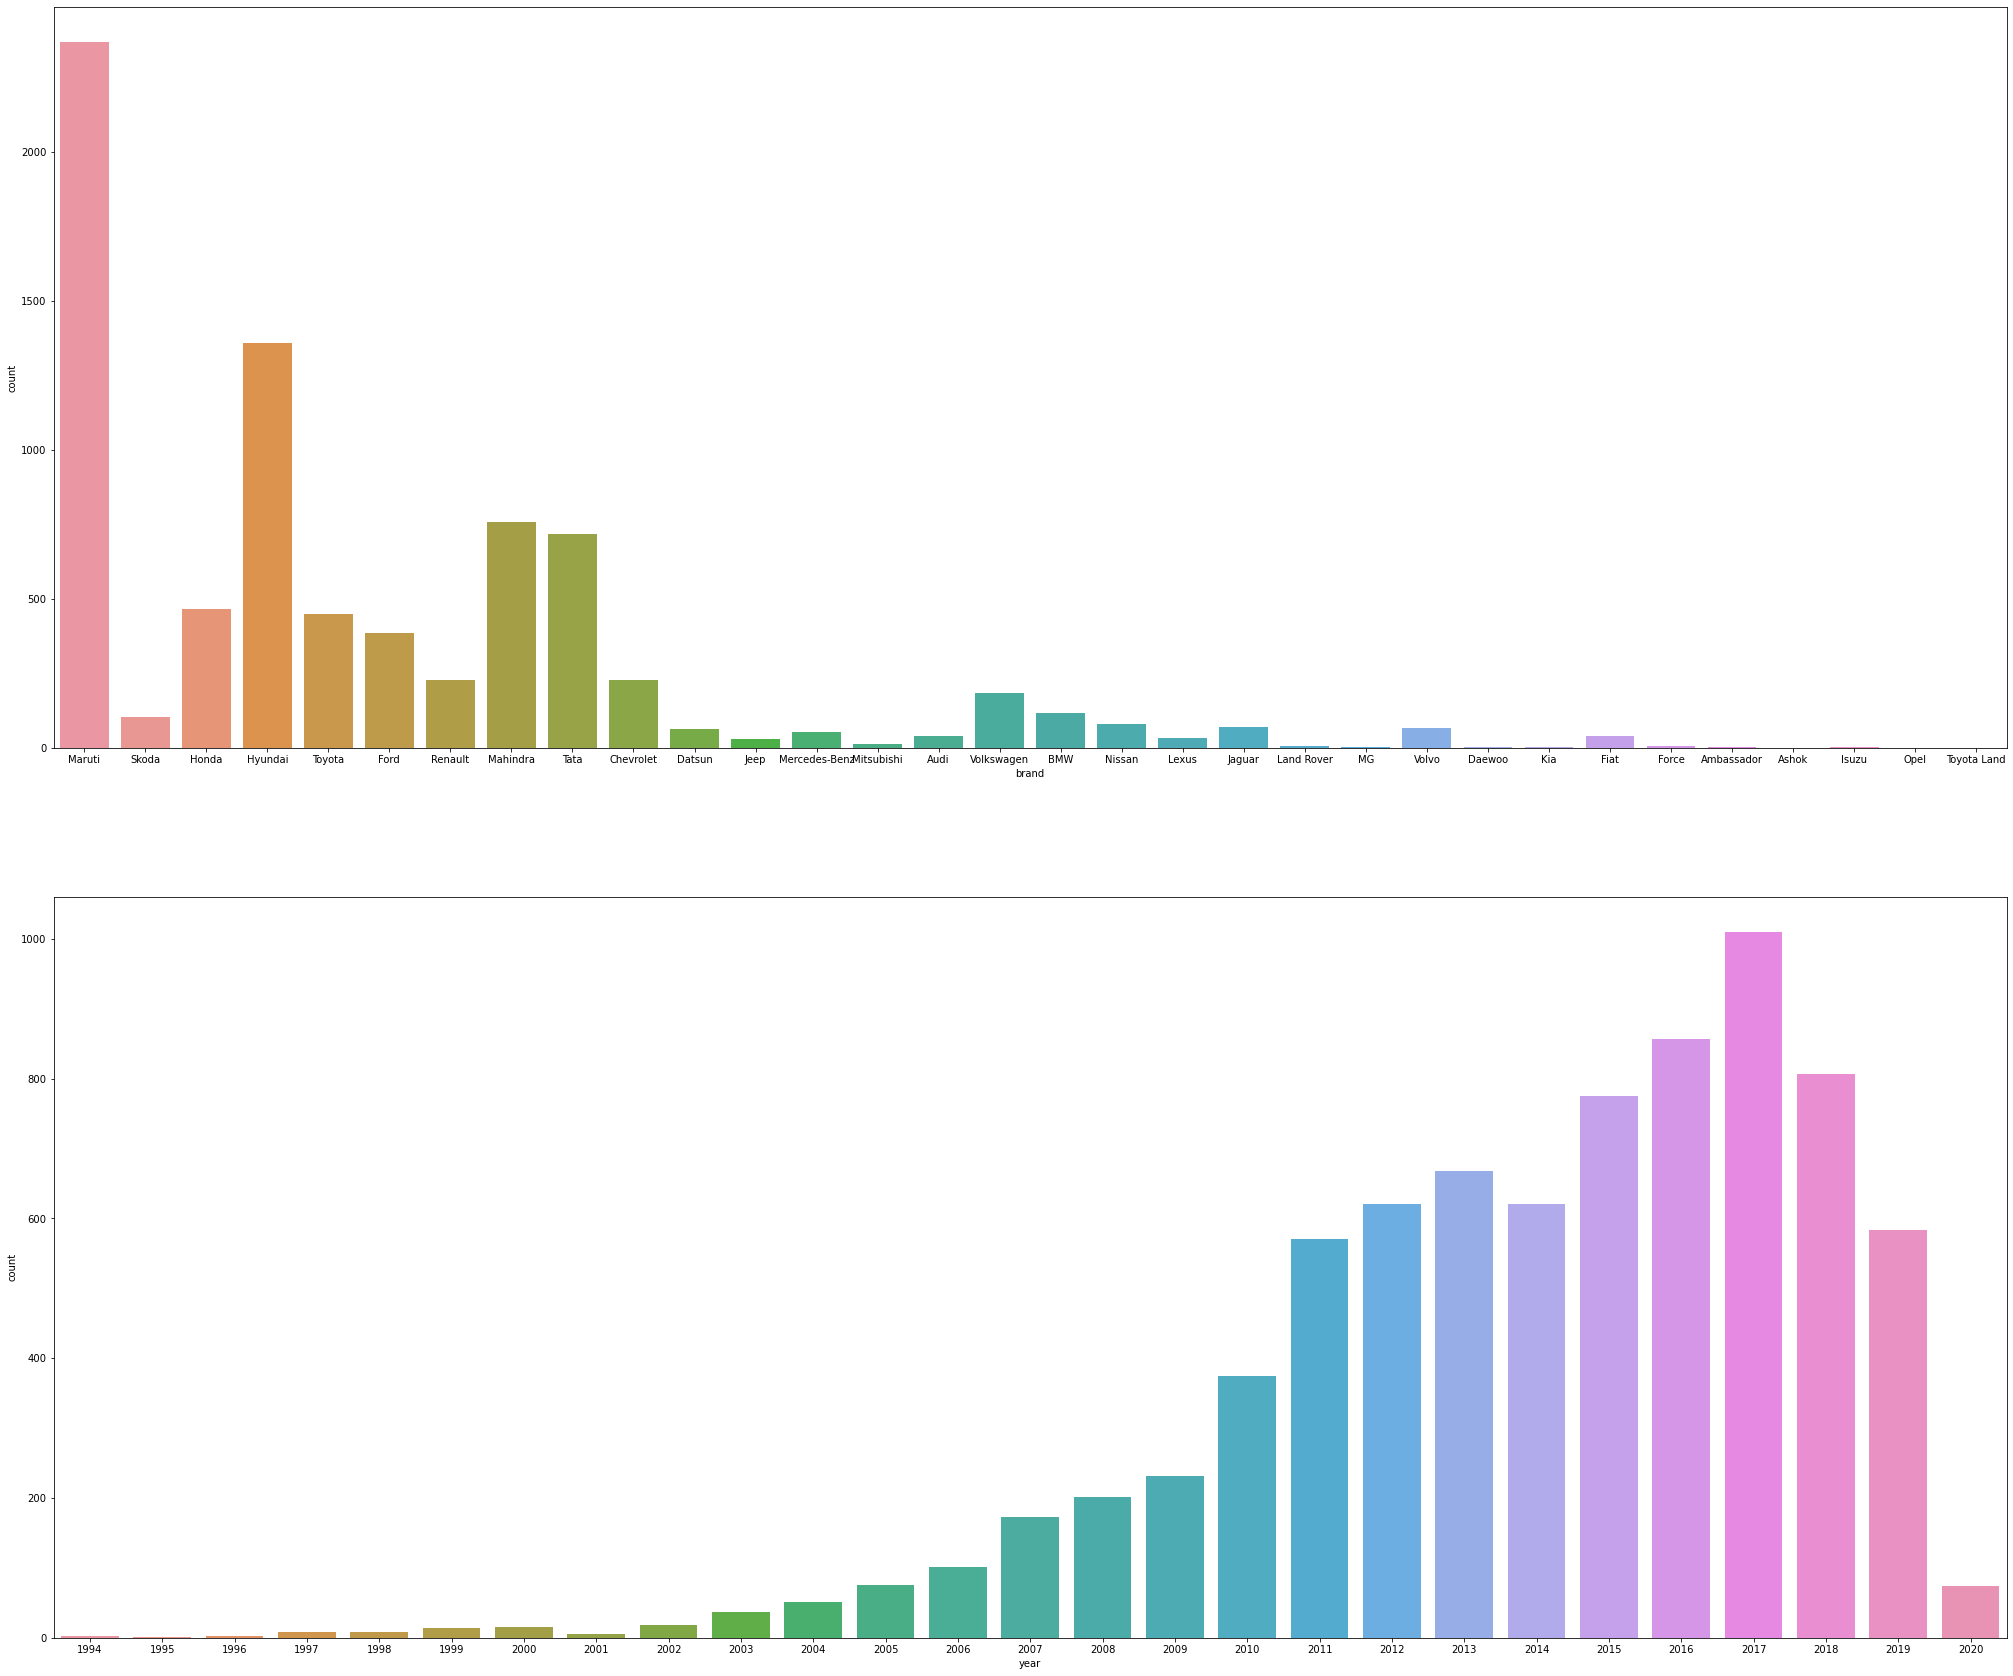

In [32]:
plt.figure(figsize=(35,30))

plt.subplot(2,1,1)
sns.countplot(sp.brand)

plt.subplot(2,1,2)
sns.countplot(sp.year)

plt.show()

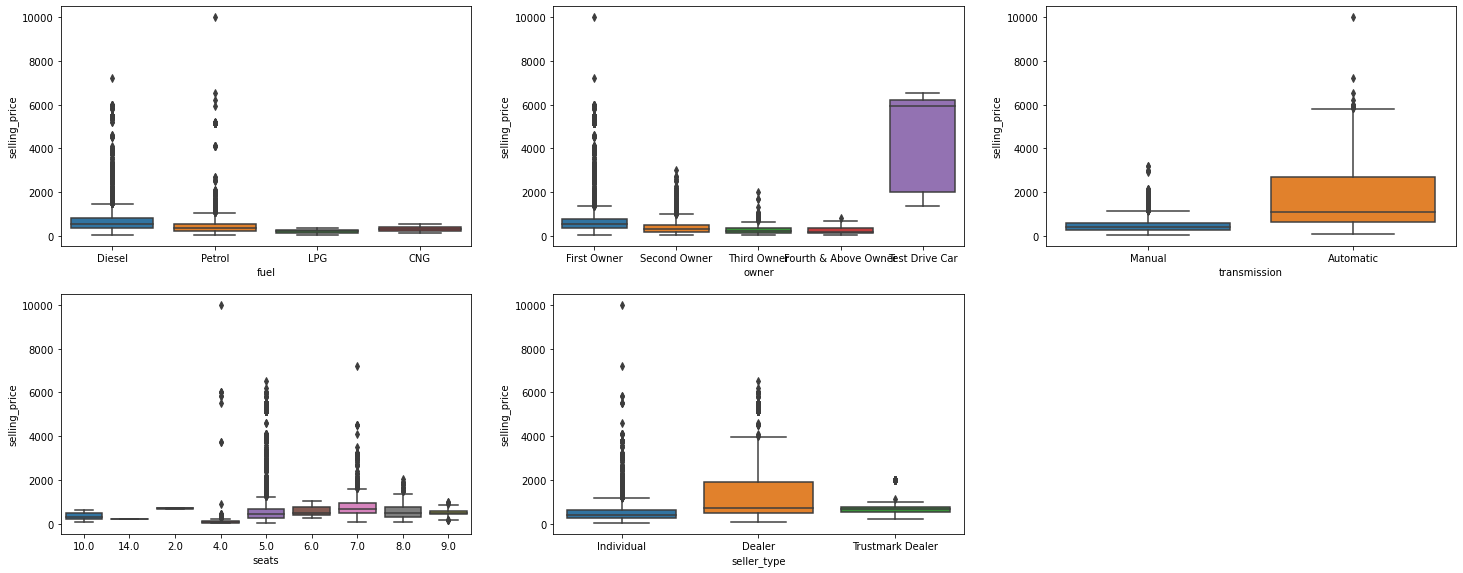

In [33]:
# visualising categorical data vs selling_price

plt.figure(figsize = (25,15))

plt.subplot(3,3,1)
sns.boxplot(x = 'fuel',y='selling_price', data = sp)

plt.subplot(3,3,2)
sns.boxplot(x = 'owner',y='selling_price', data = sp)

plt.subplot(3,3,3)
sns.boxplot(x = 'transmission',y='selling_price', data = sp)

plt.subplot(3,3,4)
sns.boxplot(x = 'seats',y='selling_price', data = sp)

plt.subplot(3,3,5)
sns.boxplot(x = 'seller_type',y='selling_price', data = sp)

plt.show()

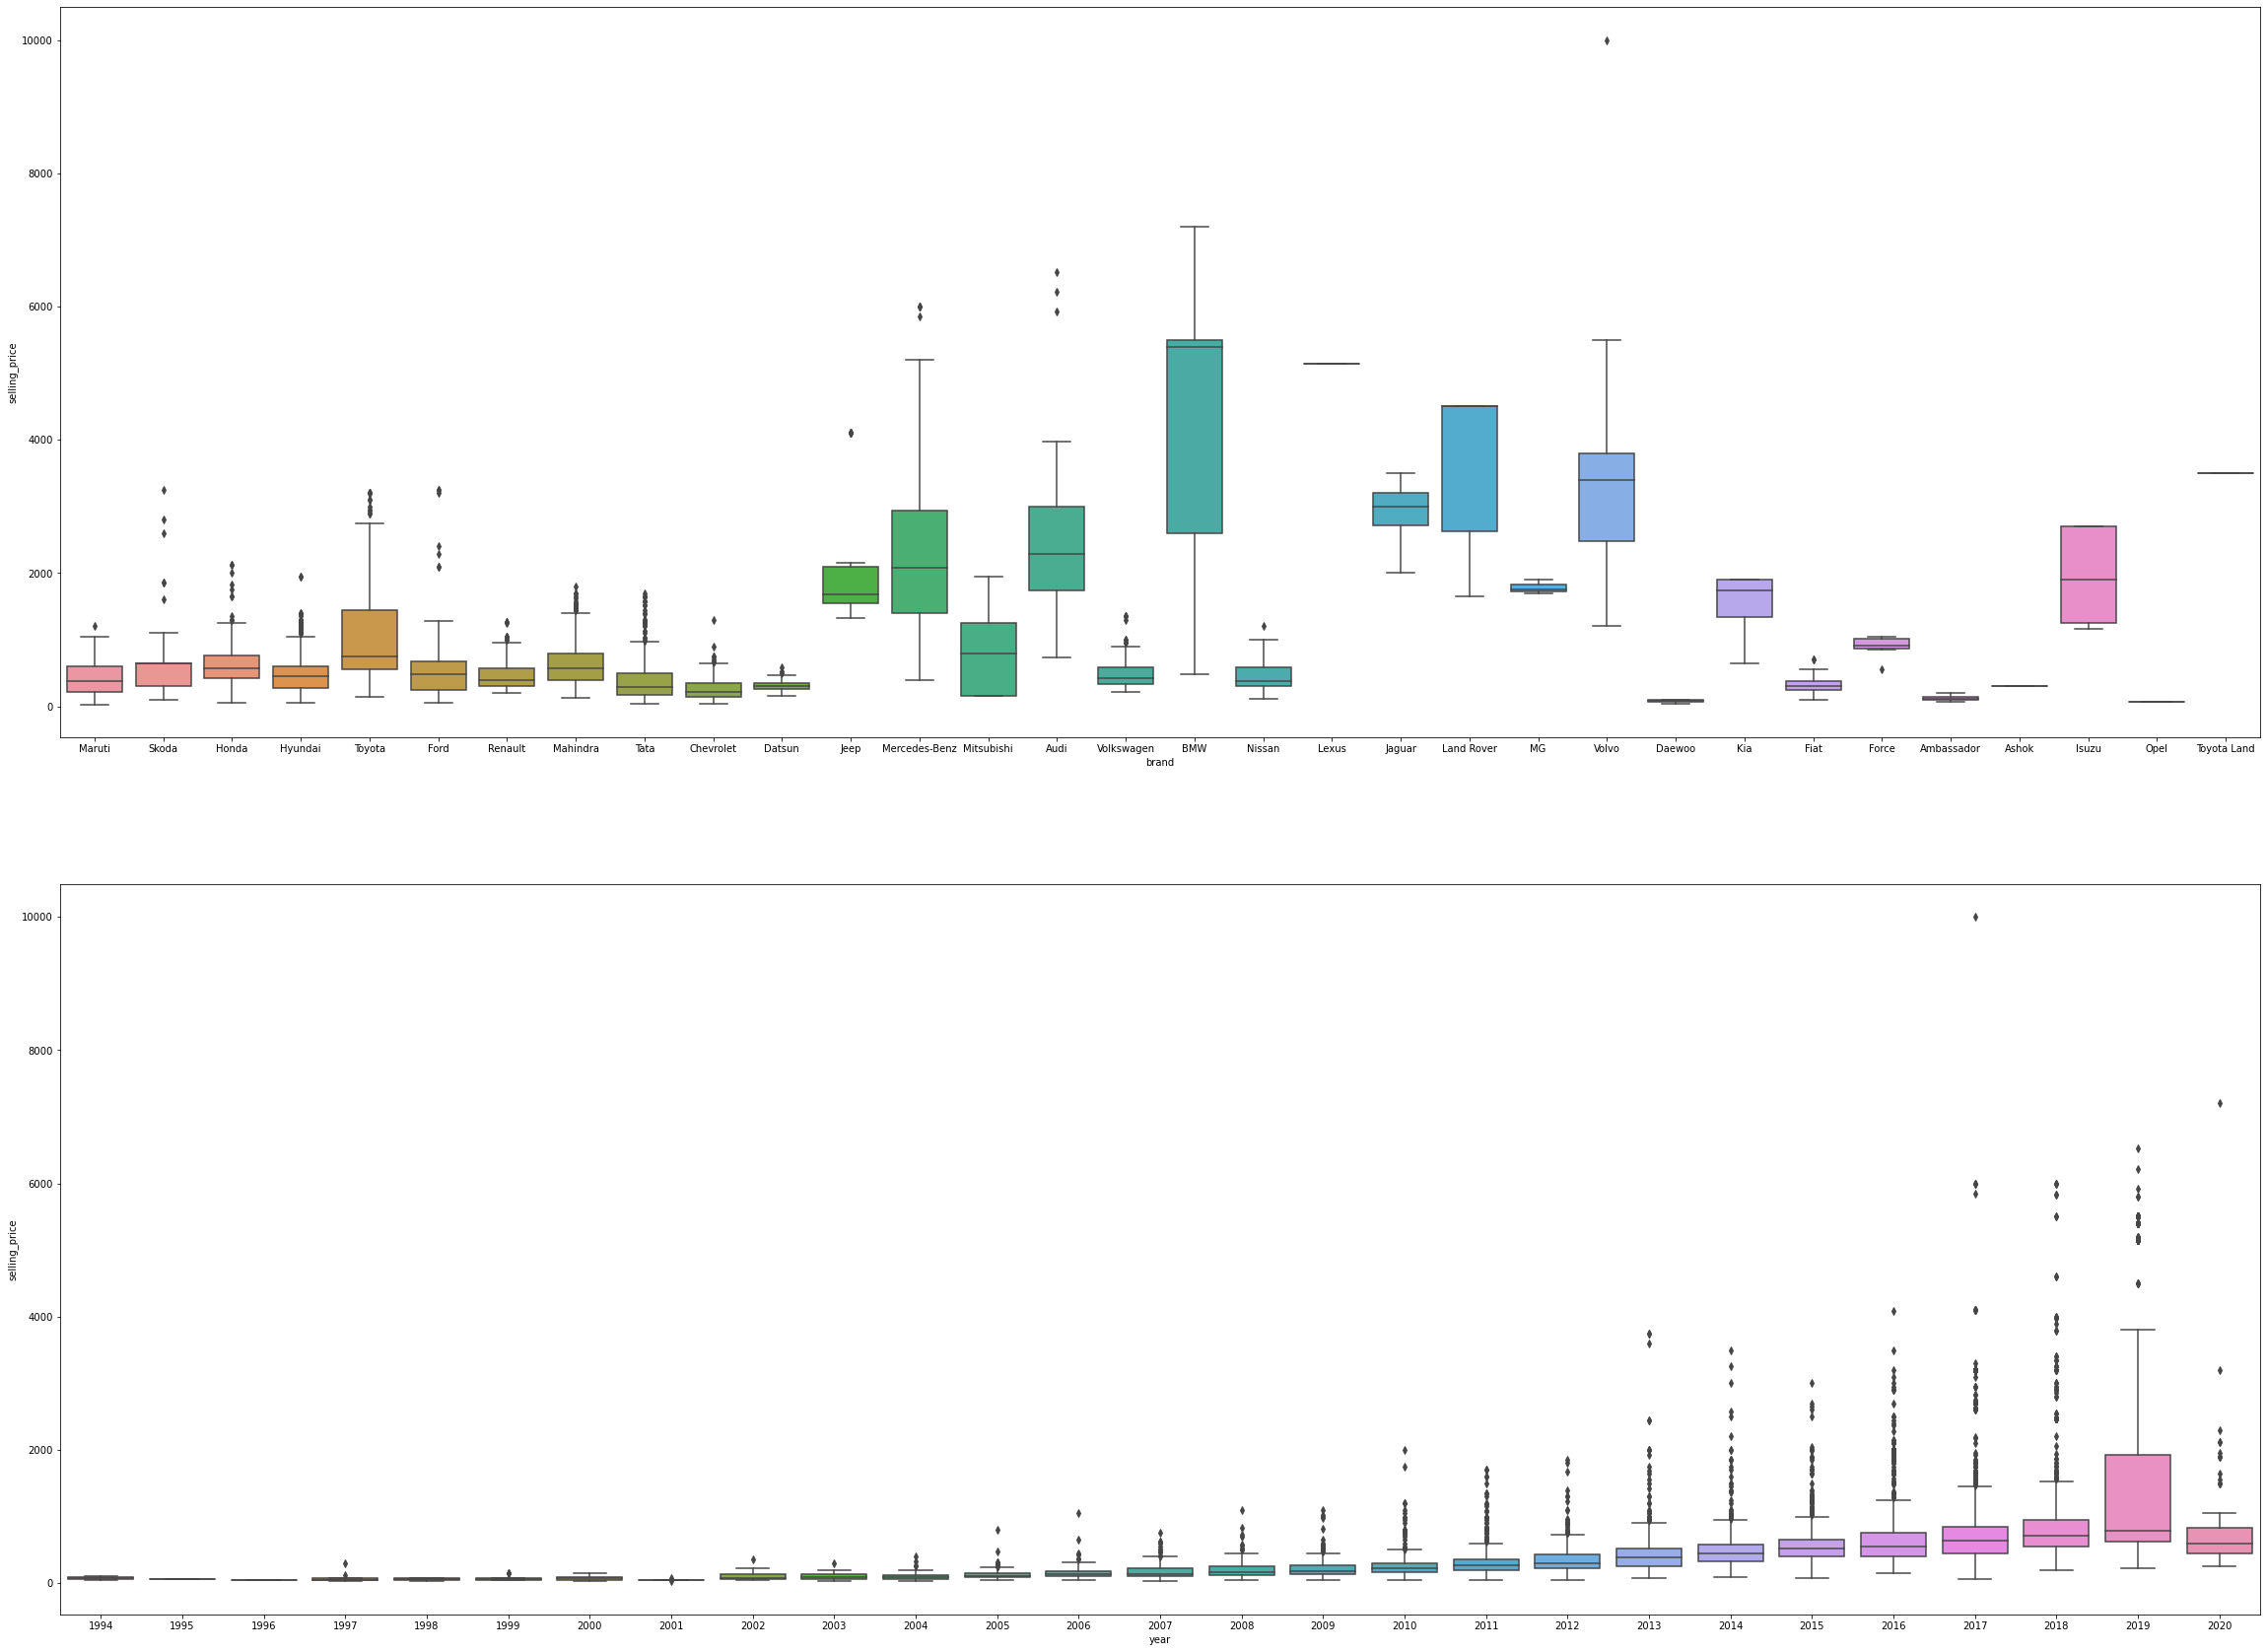

In [34]:
plt.figure(figsize=(40,30))

plt.subplot(2,1,1)
sns.boxplot(x = 'brand',y='selling_price', data = sp)

plt.subplot(2,1,2)
sns.boxplot(x = 'year',y='selling_price', data = sp)

plt.show()

In [35]:
# removing the outlier where car price is very high
sp.drop(sp[sp['selling_price'] > 6000].index, inplace = True)

### Encoding categorical data

In [36]:
#creating dummies for categorical data by defining fucntion
def dummies(x,sp):
    cp = pd.get_dummies(sp[x], drop_first = True)
    sp = pd.concat([cp, sp], axis = 1)
    return sp

#appliying dummies function to features
sp = dummies('fuel',sp)
sp = dummies('seller_type',sp)
sp = dummies('transmission',sp)
sp = dummies('owner',sp)
sp = dummies('seats',sp)
sp = dummies('brand',sp)
sp = dummies('year',sp)

sp.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Toyota Land,Volkswagen,Volvo,14.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,average_kmpl,engine_cc,power_bhp,Torq_nm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2014,450.00,145.50,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.40,1248,74.00,190.00
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,2014,370.00,120.00,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,1498,103.52,250.00
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,2006,158.00,140.00,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.70,1497,78.00,12.70
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2010,225.00,127.00,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.00,1396,90.00,22.40
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,2007,130.00,120.00,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.10,1298,88.20,11.50


In [37]:
#dropping orignal columns after dummies
#and dropping columns that are not required for the analysis

sp = sp.drop(['brand','fuel','seller_type','transmission','owner','seats','year'],axis = 1)

In [38]:
sp.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Toyota Land,Volkswagen,Volvo,14.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,selling_price,km_driven,average_kmpl,engine_cc,power_bhp,Torq_nm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,450.00,145.50,23.40,1248,74.00,190.00
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,370.00,120.00,21.14,1498,103.52,250.00
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,158.00,140.00,17.70,1497,78.00,12.70
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,225.00,127.00,23.00,1396,90.00,22.40
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,130.00,120.00,16.10,1298,88.20,11.50


## Building Model

In [39]:
# Splitting data into test and train sets
sp_train,sp_test = train_test_split(sp ,train_size = 0.7, random_state = 100)
print(sp_train.shape)
print(sp_test.shape)

(5531, 81)
(2371, 81)


In [40]:
# scaling the dataset
scaler = MinMaxScaler()

In [41]:
#applying MinMax scaling to all the numerical data
num_var = ['selling_price','km_driven','average_kmpl','engine_cc','power_bhp','Torq_nm']

sp_train[num_var] = scaler.fit_transform(sp_train[num_var])
sp_test[num_var] = scaler.transform(sp_test[num_var])

In [42]:
sp_train.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Toyota Land,Volkswagen,Volvo,14.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Manual,Individual,Trustmark Dealer,Diesel,LPG,Petrol,selling_price,km_driven,average_kmpl,engine_cc,power_bhp,Torq_nm
1859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.53,0.02,0.58,0.46,0.58,0.54
3048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0.07,0.05,0.48,0.64,0.12,0.22
1036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0.04,0.02,0.68,0.06,0.06,0.08
2110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0.07,0.05,0.69,0.21,0.17,0.24
6469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.09,0.00,0.57,0.19,0.20,0.14


In [43]:
#train data
y_train = sp_train.pop('selling_price')
X_train = sp_train

#test data
y_test = sp_test.pop('selling_price')
X_test = sp_test

In [44]:
# linear model

model_linear = SVR(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [45]:
#checking mean square error
np.sqrt(mean_squared_error(y_test, y_pred))

0.06421980974547646

In [46]:
# checking the goodness of the model
metrics.r2_score(y_test, y_pred)

0.7656445033836219

In [47]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVR(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [48]:
#checking mean square error
np.sqrt(mean_squared_error(y_test, y_pred))

0.049465948809767256

In [49]:
# checking the goodness of the model
metrics.r2_score(y_test, y_pred)

0.8609567846438301

r2_score for non-linear model is very high compared to linear model thus we can conclude that our problem is non linear in nature ans we can work on hyper parameters for a non-linear model.

## Grid Search: Hyperparameter Tuning

Tuning the model to find the optimal values of C and gamma corresponding to an RBF kernel. using 5-fold cross validation.

In [51]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [2e-1, 2e-2, 2e-3],
                     'C': [1, 10, 100, 1000]}]


# model
model = SVR(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   17.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.2, 0.02, 0.002]}],
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10,0.01,0.02,0.00,1,0.20,"{'C': 1, 'gamma': 0.2}",0.87,0.87,0.86,0.86,0.90,0.87,0.01,2,0.89,0.89,0.89,0.90,0.89,0.89,0.00
1,0.16,0.01,0.02,0.00,1,0.02,"{'C': 1, 'gamma': 0.02}",0.78,0.80,0.78,0.76,0.84,0.79,0.03,9,0.80,0.80,0.82,0.81,0.80,0.81,0.01
2,0.19,0.01,0.04,0.01,1,0.00,"{'C': 1, 'gamma': 0.002}",0.72,0.71,0.70,0.70,0.74,0.71,0.02,12,0.72,0.72,0.73,0.73,0.71,0.72,0.01
3,0.08,0.01,0.02,0.00,10,0.20,"{'C': 10, 'gamma': 0.2}",0.87,0.87,0.86,0.86,0.90,0.87,0.01,4,0.89,0.89,0.89,0.90,0.89,0.89,0.00
4,0.19,0.01,0.02,0.01,10,0.02,"{'C': 10, 'gamma': 0.02}",0.83,0.82,0.80,0.79,0.85,0.82,0.02,7,0.83,0.82,0.84,0.84,0.83,0.83,0.01
5,0.20,0.02,0.03,0.00,10,0.00,"{'C': 10, 'gamma': 0.002}",0.77,0.78,0.76,0.73,0.81,0.77,0.03,11,0.78,0.79,0.79,0.79,0.77,0.78,0.01
6,0.09,0.00,0.02,0.00,100,0.20,"{'C': 100, 'gamma': 0.2}",0.87,0.87,0.86,0.86,0.90,0.87,0.01,3,0.89,0.89,0.89,0.90,0.89,0.89,0.00
7,0.22,0.01,0.02,0.00,100,0.02,"{'C': 100, 'gamma': 0.02}",0.84,0.82,0.81,0.80,0.85,0.83,0.02,6,0.84,0.84,0.85,0.86,0.84,0.85,0.01
8,0.27,0.01,0.03,0.00,100,0.00,"{'C': 100, 'gamma': 0.002}",0.79,0.79,0.76,0.75,0.82,0.78,0.03,10,0.79,0.79,0.80,0.80,0.79,0.80,0.01
9,0.08,0.00,0.02,0.00,1000,0.20,"{'C': 1000, 'gamma': 0.2}",0.87,0.87,0.86,0.86,0.90,0.87,0.01,1,0.89,0.89,0.89,0.90,0.89,0.89,0.00


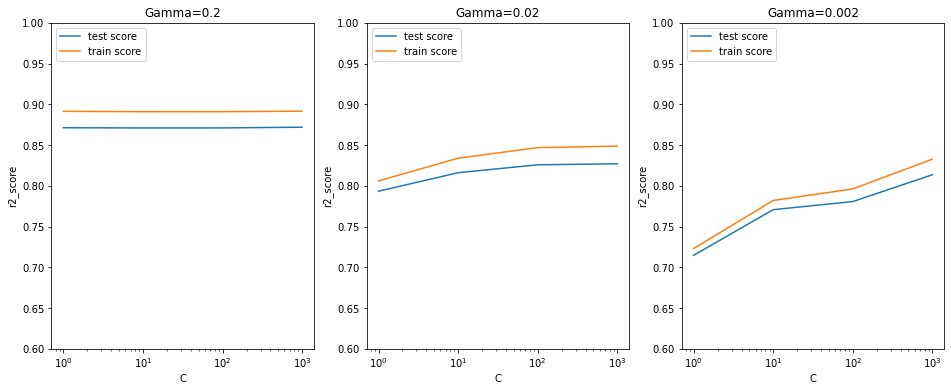

In [53]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.2]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('r2_score')
plt.title("Gamma=0.2")
plt.ylim([0.60, 1])
plt.legend(['test score', 'train score'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.02]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('r2_score')
plt.title("Gamma=0.02")
plt.ylim([0.60, 1])
plt.legend(['test score', 'train score'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.002]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('r2_score')
plt.title("Gamma=0.002")
plt.ylim([0.60, 1])
plt.legend(['test score', 'train score'], loc='upper left')
plt.xscale('log')

The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

In [54]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8720316837944097 corresponding to hyperparameters {'C': 1000, 'gamma': 0.2}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [55]:
# model with optimal hyperparameters

# model
model = SVR(C=1000, gamma=0.2, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [56]:
#checking mean square error
np.sqrt(mean_squared_error(y_test, y_pred))


0.04762262290628899

In [57]:
# checking the goodness of the model
metrics.r2_score(y_test, y_pred)

0.8711264661760696